<a href="https://colab.research.google.com/github/mr-alamdari/NLP-ChatBots/blob/main/NLP_ChatBots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/mr-alamdari/NLP-ChatBots/main/train_qa.txt

--2022-05-02 08:52:36--  https://raw.githubusercontent.com/mr-alamdari/NLP-ChatBots/main/train_qa.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3804342 (3.6M) [application/octet-stream]
Saving to: ‘train_qa.txt.1’

train_qa.txt.1      100%[===================>]   3.63M  --.-KB/s    in 0.07s   

2022-05-02 08:52:36 (48.8 MB/s) - ‘train_qa.txt.1’ saved [3804342/3804342]



In [5]:
!wget https://raw.githubusercontent.com/mr-alamdari/NLP-ChatBots/main/test_qa.txt

--2022-05-02 08:52:36--  https://raw.githubusercontent.com/mr-alamdari/NLP-ChatBots/main/test_qa.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 377233 (368K) [application/octet-stream]
Saving to: ‘test_qa.txt.1’

test_qa.txt.1       100%[===================>] 368.39K  --.-KB/s    in 0.03s   

2022-05-02 08:52:36 (10.4 MB/s) - ‘test_qa.txt.1’ saved [377233/377233]



In [6]:
with open('train_qa.txt', 'rb') as f:
  train_data = pickle.load(f)

In [7]:
with open('test_qa.txt', 'rb') as f:
  test_data = pickle.load(f)

In [8]:
len(train_data)

10000

In [9]:
len(test_data)

1000

In [10]:
' '.join(train_data[10][0])

'Sandra went back to the hallway . Sandra moved to the office .'

In [11]:
' '.join(train_data[10][1])

'Is Sandra in the office ?'

In [12]:
train_data[10][2]

'yes'

In [13]:
all_data = train_data + train_data

In [14]:
vocab = set(['yes', 'no'])
for story, question, answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [15]:
vocab_len = len(vocab) + 1

In [16]:
vocab_len

38

In [17]:
all_story_length = [len(data[0]) for data in all_data]

In [18]:
max_story_len = max(all_story_length)

In [19]:
max_story_len

156

In [20]:
all_question_length = [len(data[1]) for data in all_data]

In [21]:
max_question_length = max(all_question_length)

In [22]:
max_question_length

6

In [23]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(vocab)

In [24]:
tokenizer.word_index

{'apple': 17,
 'back': 7,
 'bathroom': 31,
 'bedroom': 27,
 'daniel': 11,
 'discarded': 9,
 'down': 5,
 'dropped': 4,
 'football': 28,
 'garden': 15,
 'got': 12,
 'grabbed': 14,
 'hallway': 18,
 'in': 23,
 'is': 30,
 'john': 8,
 'journeyed': 26,
 'kitchen': 16,
 'left': 19,
 'mary': 33,
 'milk': 20,
 'moved': 29,
 'no': 2,
 'office': 35,
 'picked': 10,
 'put': 1,
 'sandra': 34,
 'the': 32,
 'there': 3,
 'to': 25,
 'took': 13,
 'travelled': 24,
 'up': 6,
 'went': 22,
 'yes': 21}

In [25]:
train_story_text = []
train_question_text = []
train_answers = []

In [26]:
for story, question, answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [27]:
train_story_text[20]

['Daniel',
 'got',
 'the',
 'apple',
 'there',
 '.',
 'John',
 'picked',
 'up',
 'the',
 'football',
 'there',
 '.',
 'Daniel',
 'left',
 'the',
 'apple',
 '.',
 'Daniel',
 'moved',
 'to',
 'the',
 'kitchen',
 '.']

In [28]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [29]:
train_story_seq[20]

[11, 12, 32, 17, 3, 8, 10, 6, 32, 28, 3, 11, 19, 32, 17, 11, 29, 25, 32, 16]

In [30]:
len(train_story_seq), len(train_story_text)

(10000, 10000)

In [31]:
def vectorize_texts(data, max_story_len=max_story_len, max_question_len=max_question_length, word_index=tokenizer.word_index, vocab_len=vocab_len):
  stories = []
  questions = []
  answers = []

  for story, question, answer in data:
    s = [word_index[word.lower()] for word in story if word.isalpha()]
    q = [word_index[word.lower()] for word in question if word.isalpha()]
    y = np.zeros(vocab_len)
    y[word_index[answer]] = 1

    stories.append(s)
    questions.append(q)
    answers.append(y)
  
  return (tf.keras.preprocessing.sequence.pad_sequences(stories, maxlen=max_story_len),
          tf.keras.preprocessing.sequence.pad_sequences(questions, maxlen=max_question_length),
          np.array(answers))

In [32]:
data = train_data
inputs_train, questions_train, answers_train = vectorize_texts(data)

In [33]:
data = test_data
inputs_test, questions_test, answers_test = vectorize_texts(data)

In [34]:
inputs_train

array([[ 0,  0,  0, ..., 25, 32, 27],
       [ 0,  0,  0, ..., 25, 32, 18],
       [ 0,  0,  0, ..., 25, 32, 31],
       ...,
       [ 0,  0,  0, ..., 25, 32, 27],
       [ 0,  0,  0, ..., 32, 20,  3],
       [ 0,  0,  0, ..., 32, 17,  3]], dtype=int32)

In [35]:
questions_train

array([[ 0, 30, 34, 23, 32, 18],
       [ 0, 30, 11, 23, 32, 31],
       [ 0, 30, 11, 23, 32, 35],
       ...,
       [ 0, 30, 34, 23, 32, 18],
       [ 0, 30, 33, 23, 32, 16],
       [ 0, 30, 33, 23, 32, 27]], dtype=int32)

In [36]:
answers_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
len(answers_test)

1000

In [38]:
sum(answers_test)

array([  0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [39]:
#(max_story_len, batch_size) ==> scince we don't know the batch size, we use (max_story_len, ) to select it automaticaly
input_sequence = tf.keras.layers.Input((max_story_len, ))
question = tf.keras.layers.Input((max_question_length, ))

In [40]:
vocab_len = len(vocab) + 1 

###Input Encoder M

In [41]:
input_encoder_m = tf.keras.models.Sequential()
input_encoder_m.add(tf.keras.layers.Embedding(input_dim=vocab_len, output_dim=64))
input_encoder_m.add(tf.keras.layers.Dropout(0.3))

#(samples, story_maxlen, embedding_dim)

###Input Encoder C

In [42]:
input_encoder_c = tf.keras.models.Sequential()
input_encoder_c.add(tf.keras.layers.Embedding(input_dim=vocab_len, output_dim=max_question_length))
input_encoder_c.add(tf.keras.layers.Dropout(0.3))

#(samples, story_maxlen, max_question_len)

###Question Encoder

In [43]:
question_encoder = tf.keras.models.Sequential()
question_encoder.add(tf.keras.layers.Embedding(input_dim=vocab_len, output_dim=64, input_length=max_question_length))
question_encoder.add(tf.keras.layers.Dropout(0.3))

#(samples, query_maxlen, embedding_len)

In [44]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [45]:
match = tf.keras.layers.dot([input_encoded_m, question_encoded], axes=(2, 2))
match = tf.keras.layers.Activation('softmax')(match)

In [46]:
match.shape

TensorShape([None, 156, 6])

In [47]:
response = tf.keras.layers.add([match, input_encoded_c])
response = tf.keras.layers.Permute((2, 1))(response)

In [48]:
response.shape

TensorShape([None, 6, 156])

In [49]:
answer = tf.keras.layers.concatenate([response, question_encoded])

In [50]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [51]:
answer.shape

TensorShape([None, 6, 220])

In [52]:
answer = tf.keras.layers.LSTM(32)(answer)

In [53]:
answer = tf.keras.layers.Dropout(0.5)(answer)

In [54]:
answer = tf.keras.layers.Dense(vocab_len)(answer)

In [55]:
answer = tf.keras.layers.Activation('softmax')(answer)

In [56]:
model = tf.keras.models.Model([input_sequence, question], answer)

In [57]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [59]:
history = model.fit([inputs_train, questions_train],
                    answers_train,
                    batch_size=32, 
                    epochs=10,
                    validation_data=([inputs_test, questions_test], answers_test))

Epoch 1/10
313/313 [==============================] - 9s 20ms/step - loss: 0.9042 - accuracy: 0.4966 - val_loss: 0.6951 - val_accuracy: 0.5030
Epoch 2/10
313/313 [==============================] - 6s 18ms/step - loss: 0.7041 - accuracy: 0.5059 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 3/10
313/313 [==============================] - 6s 20ms/step - loss: 0.6968 - accuracy: 0.5001 - val_loss: 0.6946 - val_accuracy: 0.5030
Epoch 4/10
313/313 [==============================] - 9s 30ms/step - loss: 0.6956 - accuracy: 0.4924 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 5/10
313/313 [==============================] - 7s 22ms/step - loss: 0.6944 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 6/10
313/313 [==============================] - 5s 17ms/step - loss: 0.6942 - accuracy: 0.5051 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 7/10
313/313 [==============================] - 5s 17ms/step - loss: 0.6941 - accuracy: 0.5037 - val_loss: 0.6935 - val_accuracy: 0.4830

In [65]:
def plot_history(hist, name='accuracy'):
  train_hist = hist.history[name]
  val_hist = hist.history[f'val_{name}']
  plt.plot(train_hist)
  plt.plot(val_hist)
  plt.title(f'Model {name}')
  plt.xlabel('epoch')
  plt.ylabel(name)
  plt.legend(['Train', 'Validation'])
  plt.show()

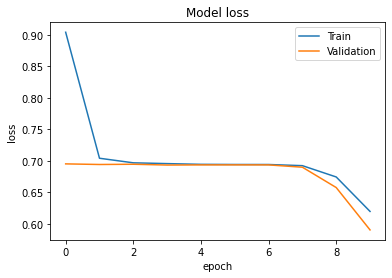

In [66]:
plot_history(history, name='loss')

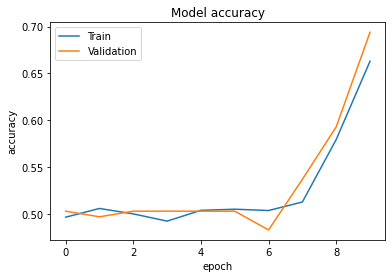

In [67]:
plot_history(history)

In [68]:
model.save('my_model.h5')

In [69]:
pred_results = model.predict(([inputs_test, questions_test]))

In [70]:
pred_results

array([[2.67440203e-09, 2.33089370e-09, 4.99573708e-01, ...,
        3.21732352e-09, 3.51310270e-09, 2.89508462e-09],
       [2.22387886e-10, 1.85963092e-10, 6.54822826e-01, ...,
        2.33540659e-10, 3.34206302e-10, 2.55229782e-10],
       [5.35140855e-11, 8.21205673e-11, 2.67652065e-01, ...,
        6.07058223e-11, 6.82675791e-11, 6.27276356e-11],
       ...,
       [5.81008186e-10, 6.06855399e-10, 3.30359519e-01, ...,
        6.91758983e-10, 8.75242878e-10, 6.83298251e-10],
       [6.02023154e-11, 9.95638225e-11, 2.50060022e-01, ...,
        7.05205686e-11, 7.03813466e-11, 6.97541677e-11],
       [1.01625632e-10, 1.21220256e-10, 4.48987931e-01, ...,
        1.19050367e-10, 1.22240926e-10, 1.13630064e-10]], dtype=float32)